In [1]:
import graph_constructor as gc 
import node_metrics_calculator as nmc
import seaborn as sns
import numpy as np
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FuncFormatter
import tikzplotlib
from tikzplotlib import save as tikz_save


In [45]:
download_plots = True
create_data = False # Set to true if no data files are written yet.
create_data_neff = False
fig_filetype = 'png'

In [3]:
ps1_chls = pd.read_csv(os.getcwd() + '\data\PSI_chls.csv')
filtered_inStrength = [v for v in np.log(ps1_chls['inStrength']) if not np.isnan(v) and not np.isinf(v)]
filtered_outStrength = [v for v in np.log(ps1_chls['outStrength'])  if not np.isnan(v) and not np.isinf(v)]
filtered_farness = [v for v in ps1_chls['farness']  if not np.isnan(v) and not np.isinf(v)]
filtered_TP700 = [v for v in np.log(ps1_chls['transferToP700']) if not np.isnan(v) and not np.isinf(v)]

c:\Users\Ron\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
filename = os.path.join(os.getcwd(), "figures")
directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

Load pre-generated random and BC-based node removal strategies 

In [5]:
qeff_rand = np.genfromtxt(os.getcwd() + '\data\qeff_random.csv', delimiter=',') 
qeff_rand_median = np.median(qeff_rand, axis=1)
qeff_BCs = np.genfromtxt(os.getcwd() + '\data\qeff_BCs.csv', delimiter=',')
qeff_BC_median = np.median(qeff_BCs, axis=1)

neff_rand = np.genfromtxt(os.getcwd() + '\data\\neff_random.csv', delimiter=',') 
neff_rand_median = np.median(neff_rand, axis=1)
neff_BC = np.genfromtxt(os.getcwd() + '\data\\neff_BCs.csv', delimiter=',')
neff_BC_median = np.median(neff_BC, axis=1)

In [6]:
def format_y_axis(value, _):
    return f"{value:.0f}"

# Node metrics histograms

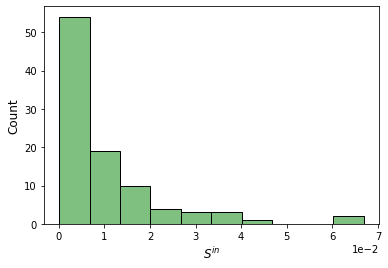

In [7]:
# InStrengths
fig, ax = plt.subplots()
sns.histplot(ps1_chls['inStrength'], bins=10, alpha=0.5, color='green')
ax.set_xlabel('$S^{in}}$', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))


if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/inStrength_histplot.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/inStrength_histplot.' + fig_filetype, dpi=300)
         

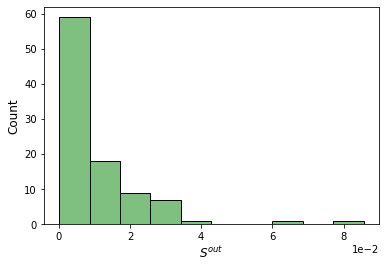

In [8]:
# outStrengths
fig, ax = plt.subplots()
sns.histplot(ps1_chls['outStrength'], bins=10, alpha=0.5, color='green')
ax.set_xlabel('$S^{out}}$', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/outStrength_histplot.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/outStrength_histplot.' + fig_filetype, dpi=300)

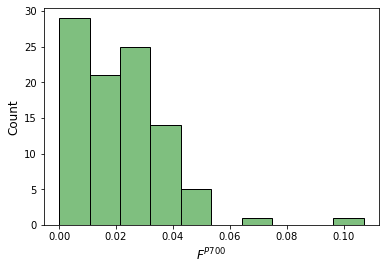

In [9]:
fig, ax = plt.subplots()
sns.histplot(filtered_farness, bins=10, alpha=0.5, color='green')
ax.set_xlabel('$F^{P700}$', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)


if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/farness_histplot.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/farness_histplot.' + fig_filetype, dpi=300)

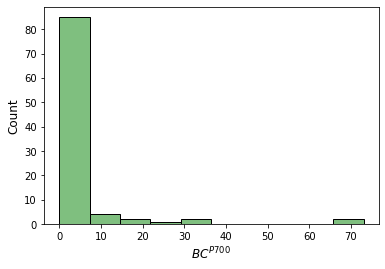

In [10]:
fig, ax = plt.subplots()
binwidth = 1    
sns.histplot(ps1_chls['BC'], bins=10, alpha=0.5, color='green')

ax.set_xlabel('$BC^{P700}$', fontsize = 12)

ax.set_ylabel('Count', fontsize = 12)

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/BCadhoc_histplot.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/BCadhoc_histplot.' + fig_filetype, dpi=300)

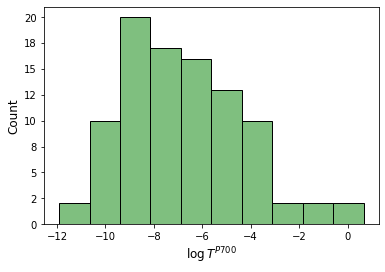

In [11]:
fig, ax = plt.subplots()
binwidth = 1    
sns.histplot(filtered_TP700, bins=10, alpha=0.5, color='green')

ax.set_xlabel('$\log T^{P700}$', fontsize = 12)

ax.set_ylabel('Count', fontsize = 12)
ax.yaxis.set_major_formatter(FuncFormatter(format_y_axis))

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/TP700_histplot.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/TP700_histplot.' + fig_filetype, dpi=300)

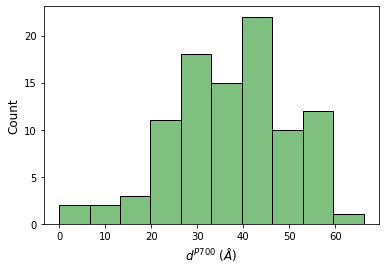

In [12]:
fig, ax = plt.subplots()
binwidth = 1    
sns.histplot(ps1_chls['euclidean_distance_to_P700'], bins=10, alpha=0.5, color='green')

ax.set_xlabel('$d^{P700}$ ($\AA$)', fontsize = 12)

ax.set_ylabel('Count', fontsize = 12)
ax.yaxis.set_major_formatter(FuncFormatter(format_y_axis))

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/dP700_histplot.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/dP700_histplot.' + fig_filetype, dpi=300)

# Targeted node removal strategies (Qeffs)

## Strategy 1: Decreasing inStrength

In [13]:
if create_data:
    g = gc.Graph()
    N = 96
    #Initialize all nodes
    for i in range(N): 
        g.addNode(gc.Node(nmc.ps1_df, i))

    for i in range(N):
        for j in range(N):
            if i != j:
                node_i = g.nodes[i]
                node_j = g.nodes[j]
                edge_add = gc.Edge(node_i, node_j)
                edge_add.setWeight(gc.transfer_rate(node_i, node_j))
                g.addEdge(edge_add)
    g.init_Costs()
    g.init_Weights()

    inStrengths = [g.nodeInStrength(g.nodes[i]) for i in range(len(g.nodes))]
    sorted_inStrength = [g.nodes[i] for i, _ in sorted(enumerate(inStrengths), key=lambda x: x[1], reverse=True) if str(g.nodes[i]) not in ['CLA1011.A', 'CLA1021.B']] 
    g.K_ij()
    qeff_inStrength = [g.Qeff()]


    for node in sorted_inStrength:
        g.removeNode(node)
        g.K_ij()
        qeff_inStrength.append(g.Qeff())
        # neff_inStrength.append(g.Neff())

    k_diss=0.001
    qeff_inStrength = np.array(qeff_inStrength)
    lifetime_inStrength= (1-qeff_inStrength)/(k_diss)

    #Generate qeff and lifetime data in Excel

    filename1 = os.getcwd() + "/data/qeff_inStrength_dec.csv"
    filename2 = os.getcwd() + "/data/lifetime_inStrength_dec.csv"

    np.savetxt(filename1, qeff_inStrength.reshape(-1,1), delimiter=',')
    np.savetxt(filename2, lifetime_inStrength.reshape(-1,1), delimiter=',')

if create_data_neff:
    g = gc.Graph()
    N = 96
    #Initialize all nodes
    for i in range(N): 
        g.addNode(gc.Node(nmc.ps1_df, i))

    for i in range(N):
        for j in range(N):
            if i != j:
                node_i = g.nodes[i]
                node_j = g.nodes[j]
                edge_add = gc.Edge(node_i, node_j)
                edge_add.setWeight(gc.transfer_rate(node_i, node_j))
                g.addEdge(edge_add)
    g.init_Costs()
    g.init_Weights()

    inStrengths = [g.nodeInStrength(g.nodes[i]) for i in range(len(g.nodes))]
    sorted_inStrength = [g.nodes[i] for i, _ in sorted(enumerate(inStrengths), key=lambda x: x[1], reverse=True) if str(g.nodes[i]) not in ['CLA1011.A', 'CLA1021.B']] 
    neff_inStrength = [g.Neff()]

    for node in sorted_inStrength:
        g.removeNode(node)
        neff_inStrength.append(g.Neff())


    neff_inStrength = np.array(neff_inStrength)


    #Generate qeff and lifetime data in Excel
    filename3 = os.getcwd() + "/data/neff_inStrength_dec.csv"

    np.savetxt(filename3, neff_inStrength.reshape(-1,1), delimiter=',')


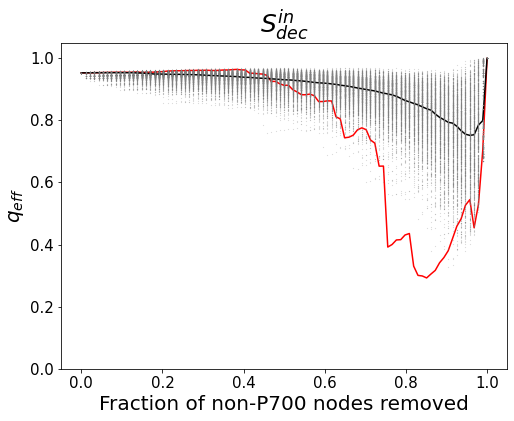

In [14]:
Test = np.genfromtxt(os.getcwd() + '\data\qeff_inStrength_dec.csv', delimiter=',')
Control = qeff_rand_median
Label = '$S^{in}_{dec}$'

test, control = np.sum(Test, axis=0), np.sum(qeff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(qeff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], Test, label=Label, c='red')
ax.plot([i/94 for i in range(95)], Control, label='Rand', c='black') 
for i in range(len(Control)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(Control)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * 1000, qeff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True) 
ax.set_ylim(0, 1.05)
ax.set_ylabel('$q_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/qeff_Sin_dec.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/qeff_Sin_dec.' + fig_filetype, dpi=300)
    
plt.show()


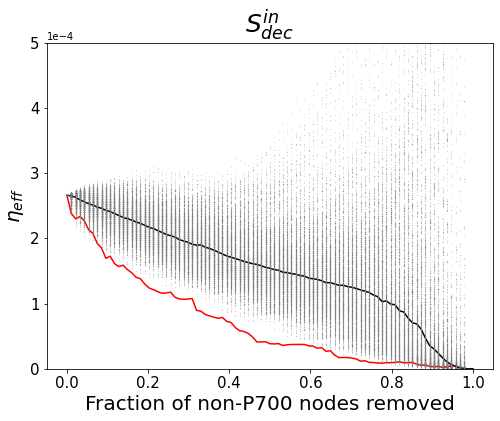

In [15]:
Test = np.genfromtxt(os.getcwd() + '\data\\neff_inStrength_dec.csv', delimiter=',')
Label = '$S^{in}_{dec}$' 
sims=np.shape(neff_rand)[1]

test, control = np.sum(Test, axis=0), np.sum(neff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(neff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot([i/94 for i in range(95)], Test, label=Label, c='red')
ax.plot([i/94 for i in range(95)], neff_rand_median, label='Rand', c='black') 
for i in range(len(neff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(neff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * sims, neff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True)
ax.set_ylim(0, 0.0005) 
ax.set_ylabel('$\eta_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/neff_inS_dec.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/neff_inS_dec.' + fig_filetype, dpi=300)
    
plt.show()


## Strategy 2: Increasing inStrength

In [16]:
if create_data:
    g = gc.Graph()
    N = 96
    #Initialize all nodes
    for i in range(N): 
        g.addNode(gc.Node(nmc.ps1_df, i))

    for i in range(N):
        for j in range(N):
            if i != j:
                node_i = g.nodes[i]
                node_j = g.nodes[j]
                edge_add = gc.Edge(node_i, node_j)
                edge_add.setWeight(gc.transfer_rate(node_i, node_j))
                g.addEdge(edge_add)
    g.init_Costs()
    g.init_Weights()

    inStrengths = [g.nodeInStrength(g.nodes[i]) for i in range(len(g.nodes))]
    sorted_inStrength = [g.nodes[i] for i, _ in sorted(enumerate(inStrengths), key=lambda x: x[1], reverse=False) if str(g.nodes[i]) not in ['CLA1011.A', 'CLA1021.B']] 
    g.K_ij()
    qeff_inStrength = [g.Qeff()]


    for node in sorted_inStrength:
        g.removeNode(node)
        g.K_ij()
        qeff_inStrength.append(g.Qeff())
        # neff_inStrength.append(g.Neff())

    k_diss=0.001
    qeff_inStrength = np.array(qeff_inStrength)
    lifetime_inStrength= (1-qeff_inStrength)/(k_diss)

    #Generate qeff and lifetime data in Excel
    filename1 = os.getcwd() + "/data/qeff_inStrength_asc.csv"
    filename2 = os.getcwd() + "/data/lifetime_inStrength_asc.csv"

    np.savetxt(filename1, qeff_inStrength.reshape(-1,1), delimiter=',')
    np.savetxt(filename2, lifetime_inStrength.reshape(-1,1), delimiter=',')

if create_data_neff:
    g = gc.Graph()
    N = 96
    #Initialize all nodes
    for i in range(N): 
        g.addNode(gc.Node(nmc.ps1_df, i))

    for i in range(N):
        for j in range(N):
            if i != j:
                node_i = g.nodes[i]
                node_j = g.nodes[j]
                edge_add = gc.Edge(node_i, node_j)
                edge_add.setWeight(gc.transfer_rate(node_i, node_j))
                g.addEdge(edge_add)
    g.init_Costs()
    g.init_Weights()

    sorted_inStrength_asc = [g.nodes[i] for i, _ in sorted(enumerate(inStrengths), key=lambda x: x[1], reverse=False) if str(g.nodes[i]) not in ['CLA1011.A', 'CLA1021.B']] 
    neff_inStrength_asc = [g.Neff()]

    for node in sorted_inStrength_asc:
        g.removeNode(node)
        g.K_ij()
        neff_inStrength_asc.append(g.Neff())

    k_diss=0.001
    neff_inStrength_asc =  np.array(neff_inStrength_asc)


    filename3 = os.getcwd() + "/data/neff_inStrength_asc.csv"


    np.savetxt(filename3, neff_inStrength_asc.reshape(-1,1), delimiter=',')


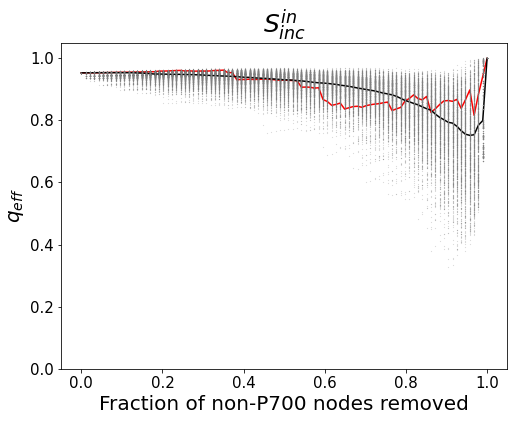

In [17]:
Test = np.genfromtxt(os.getcwd() + '\data\qeff_inStrength_asc.csv', delimiter=',')
Label = '$S_{inc}^{in}$'


test, control = np.sum(Test, axis=0), np.sum(qeff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(qeff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], Test, label=Label, c='red')
ax.plot([i/94 for i in range(95)], qeff_rand_median, label='Rand', c='black') 
for i in range(len(qeff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(qeff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * 1000, qeff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True) 
ax.set_ylim(0, 1.05)
ax.set_ylabel('$q_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/qeff_inS_inc.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/qeff_inS_inc.' + fig_filetype, dpi=300)


plt.show()


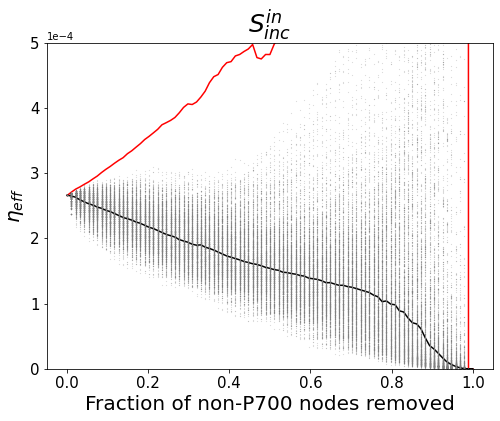

In [18]:
Test = np.genfromtxt(os.getcwd() + '\data\\neff_inStrength_asc.csv', delimiter=',')
Label = '$S^{in}_{inc}$' 
sims=np.shape(neff_rand)[1]

test, control = np.sum(Test, axis=0), np.sum(neff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(neff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], Test, label=Label, c='red')
ax.plot([i/94 for i in range(95)], neff_rand_median, label='Rand', c='black') 
for i in range(len(neff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(neff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * sims, neff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True) 
ax.set_ylabel('$\eta_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)
ax.set_ylim(0, 0.0005)

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/neff_inS_inc.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/neff_inS_inc.' + fig_filetype, dpi=300)

plt.show()


## Strategy 3: Increasing outStrength 

In [19]:
if create_data:
    g = gc.Graph()
    N = 96
    #Initialize all nodes
    for i in range(N): 
        g.addNode(gc.Node(nmc.ps1_df, i))

    for i in range(N):
        for j in range(N):
            if i != j:
                node_i = g.nodes[i]
                node_j = g.nodes[j]
                edge_add = gc.Edge(node_i, node_j)
                edge_add.setWeight(gc.transfer_rate(node_i, node_j))
                g.addEdge(edge_add)
    g.init_Costs()
    g.init_Weights()

    outStrengths = [g.nodeOutStrength(g.nodes[i]) for i in range(len(g.nodes))]
    sorted_outStrengths_asc = [g.nodes[i] for i, _ in sorted(enumerate(outStrengths), key=lambda x: x[1], reverse=False) if str(g.nodes[i]) not in ['CLA1011.A', 'CLA1021.B']] 
    g.K_ij()
    qeff_outStrength_asc = [g.Qeff()]

    for node in sorted_outStrengths_asc:
        g.removeNode(node)
        g.K_ij()
        qeff_outStrength_asc.append(g.Qeff())

    k_diss=0.001
    qeff_outStrength_asc= np.array(qeff_outStrength_asc)
    lifetime_outStrength_asc = (1-qeff_outStrength_asc)/(k_diss)

    #Generate qeff and lifetime data in Excel
    filename1 = os.getcwd() + "/data/qeff_outStrength_asc.csv"
    filename2 = os.getcwd() + "/data/lifetime_outStrength_asc.csv"

    np.savetxt(filename1, qeff_outStrength_asc.reshape(-1,1), delimiter=',')
    np.savetxt(filename2, lifetime_outStrength_asc.reshape(-1,1), delimiter=',')

if create_data_neff:
    g = gc.Graph()
    N = 96
    #Initialize all nodes
    for i in range(N): 
        g.addNode(gc.Node(nmc.ps1_df, i))

    for i in range(N):
        for j in range(N):
            if i != j:
                node_i = g.nodes[i]
                node_j = g.nodes[j]
                edge_add = gc.Edge(node_i, node_j)
                edge_add.setWeight(gc.transfer_rate(node_i, node_j))
                g.addEdge(edge_add)
    g.init_Costs()
    g.init_Weights()

    outStrengths = [g.nodeOutStrength(g.nodes[i]) for i in range(len(g.nodes))]
    sorted_outStrengths_asc = [g.nodes[i] for i, _ in sorted(enumerate(outStrengths), key=lambda x: x[1], reverse=False) if str(g.nodes[i]) not in ['CLA1011.A', 'CLA1021.B']] 
    neff_outStrength_asc = [g.Neff()]

    for node in sorted_outStrengths_asc:
        g.removeNode(node)
        g.K_ij()
        neff_outStrength_asc.append(g.Neff())


    neff_outStrength_asc = np.array(neff_outStrength_asc)
    filename3 = os.getcwd() + "/data/neff_outStrength_asc.csv"
    np.savetxt(filename3, neff_outStrength_asc.reshape(-1,1), delimiter=',')


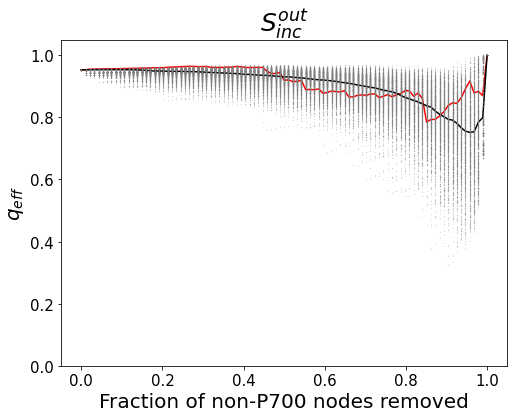

In [20]:
Test = np.genfromtxt(os.getcwd() + '\data\qeff_outStrength_asc.csv', delimiter=',')
Label = '$S_{inc}^{out}$'

test, control = np.sum(Test, axis=0), np.sum(qeff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(qeff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], Test, label=Label, c='red')
ax.plot([i/94 for i in range(95)], qeff_rand_median, label='Rand', c='black') 
for i in range(len(qeff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(qeff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * 1000, qeff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True) 
ax.set_ylim(0, 1.05)
ax.set_ylabel('$q_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)

# Show the plots
if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/qeff_outS_inc.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/qeff_outS_inc.' + fig_filetype, dpi=300)

plt.show()


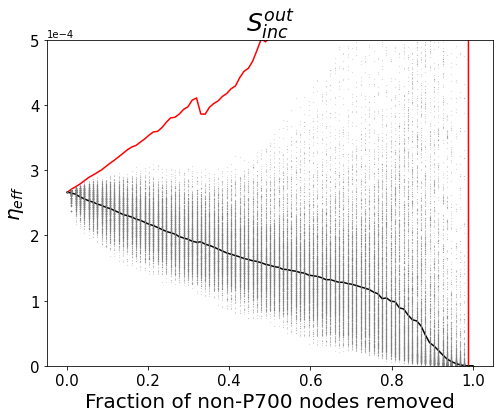

In [21]:
Test = np.genfromtxt(os.getcwd() + '\data\\neff_outStrength_asc.csv', delimiter=',')
Label = '$S^{out}_{inc}$' 
sims=np.shape(neff_rand)[1]

test, control = np.sum(Test, axis=0), np.sum(neff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(neff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], Test, label=Label, c='red')
ax.plot([i/94 for i in range(95)], neff_rand_median, label='Rand', c='black') 
for i in range(len(neff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(neff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * sims, neff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True) 
ax.set_ylabel('$\eta_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)
ax.set_ylim(0, 0.0005)

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/neff_outS_inc.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/neff_outS_inc.' + fig_filetype, dpi=300)
    
plt.show()


## Strategy 4: Decreasing outStrength

In [22]:
if create_data:
    g = gc.Graph()
    N = 96
    #Initialize all nodes
    for i in range(N): 
        g.addNode(gc.Node(nmc.ps1_df, i))

    for i in range(N):
        for j in range(N):
            if i != j:
                node_i = g.nodes[i]
                node_j = g.nodes[j]
                edge_add = gc.Edge(node_i, node_j)
                edge_add.setWeight(gc.transfer_rate(node_i, node_j))
                g.addEdge(edge_add)
    g.init_Costs()
    g.init_Weights()

    outStrengths = [g.nodeOutStrength(g.nodes[i]) for i in range(len(g.nodes))]
    sorted_outStrengths_dec = [g.nodes[i] for i, _ in sorted(enumerate(outStrengths), key=lambda x: x[1], reverse=True) if str(g.nodes[i]) not in ['CLA1011.A', 'CLA1021.B']] 
    g.K_ij()
    qeff_outStrength_dec = [g.Qeff()]

    for node in sorted_outStrengths_dec:
        g.removeNode(node)
        g.K_ij()
        qeff_outStrength_dec.append(g.Qeff())

    k_diss=0.001
    qeff_outStrength_dec = np.array(qeff_outStrength_dec)
    lifetime_outStrength_dec = (1-qeff_outStrength_dec)/(k_diss)

    #Generate qeff and lifetime data in Excel
    filename1 = os.getcwd() + "/data/qeff_outStrength_dec.csv"
    filename2 = os.getcwd() + "/data/lifetime_outStrength_dec.csv"

    np.savetxt(filename1, qeff_outStrength_dec.reshape(-1,1), delimiter=',')
    np.savetxt(filename2, lifetime_outStrength_dec.reshape(-1,1), delimiter=',')

if create_data_neff:
    g = gc.Graph()
    N = 96
    #Initialize all nodes
    for i in range(N): 
        g.addNode(gc.Node(nmc.ps1_df, i))

    for i in range(N):
        for j in range(N):
            if i != j:
                node_i = g.nodes[i]
                node_j = g.nodes[j]
                edge_add = gc.Edge(node_i, node_j)
                edge_add.setWeight(gc.transfer_rate(node_i, node_j))
                g.addEdge(edge_add)
    g.init_Costs()
    g.init_Weights()

    outStrengths = [g.nodeOutStrength(g.nodes[i]) for i in range(len(g.nodes))]
    sorted_outStrengths_dec = [g.nodes[i] for i, _ in sorted(enumerate(outStrengths), key=lambda x: x[1], reverse=True) if str(g.nodes[i]) not in ['CLA1011.A', 'CLA1021.B']] 
    neff_outStrength_dec = [g.Neff()]

    for node in sorted_outStrengths_dec:
        g.removeNode(node)
        g.K_ij()
        neff_outStrength_dec.append(g.Neff())


    neff_outStrength_dec = np.array(neff_outStrength_dec)


    #Generate qeff and lifetime data in Excel
    filename3 = os.getcwd() + "/data/neff_outStrength_dec.csv"

    np.savetxt(filename3, neff_outStrength_dec.reshape(-1,1), delimiter=',')


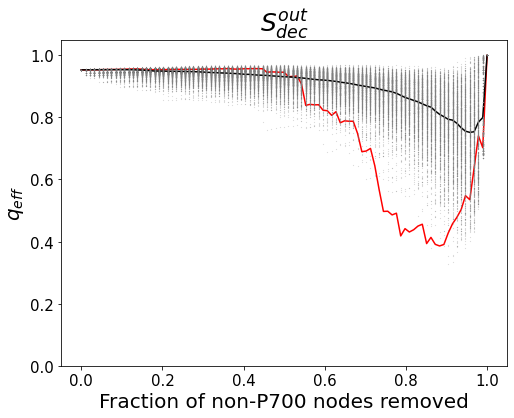

In [23]:
Test = np.genfromtxt(os.getcwd() + '\data\qeff_outStrength_dec.csv', delimiter=',')
Label = '$S_{dec}^{out}$'


test, control = np.sum(Test, axis=0), np.sum(qeff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(qeff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], Test, label=Label, c='red')
ax.plot([i/94 for i in range(95)], qeff_rand_median, label='Rand', c='black') 
for i in range(len(qeff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(qeff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * 1000, qeff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True) 
ax.set_ylim(0, 1.05)
ax.set_ylabel('$q_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)

# Show the plots
if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/qeff_outS_dec.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/qeff_outS_dec.' + fig_filetype, dpi=300)

plt.show()


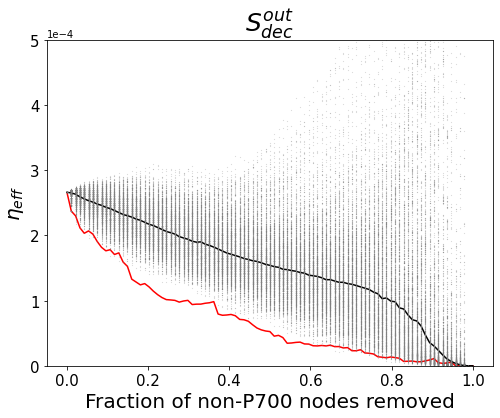

In [24]:
Test = np.genfromtxt(os.getcwd() + '\data\\neff_outStrength_dec.csv', delimiter=',')
Label = '$S^{out}_{dec}$' 
sims=np.shape(neff_rand)[1]

test, control = np.sum(Test, axis=0), np.sum(neff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(neff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], Test, label=Label, c='red')
ax.plot([i/94 for i in range(95)], neff_rand_median, label='Rand', c='black') 
for i in range(len(neff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(neff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * sims, neff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True)
ax.set_ylim(0, 0.0005)
ax.set_ylabel('$\eta_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)


if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/neff_outS_dec.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/neff_outS_dec.' + fig_filetype, dpi=300)
    
plt.show()


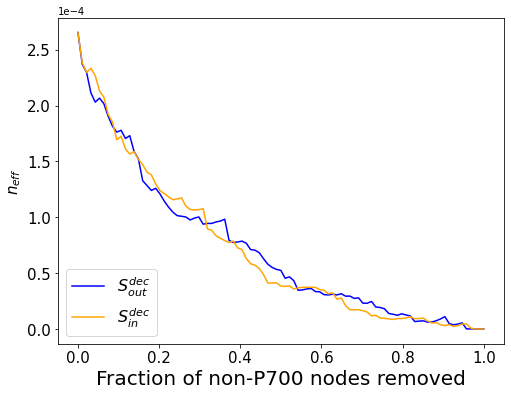

In [25]:
plot1 = np.genfromtxt(os.getcwd() + '\data\\neff_outStrength_dec.csv', delimiter=',')
plot3 = np.genfromtxt(os.getcwd() + '\data\\neff_inStrength_dec.csv', delimiter=',')
# plt.figure(figsize=(8,6))
# plt.plot([i/94 for i in range(95)], plot1, label='$S_{dec}^{out}$')
# plt.plot([i/94 for i in range(95)], plot3, label='$S_{dec}^{in}$')
# plt.legend(loc=3, fontsize=16)
# plt.ylabel('$q_{eff}$', fontsize=16)
# plt.xlabel('Fraction of antenna nodes removed', fontsize=16)

Plot1, Plot3 = np.sum(plot1), np.sum(plot3)
maxR = np.max([Plot1, Plot3])
comparison = [[Plot1/maxR], [Plot3/maxR]] 


# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], plot1, label='$S_{out}^{dec}$', c='blue')
ax.plot([i/94 for i in range(95)], plot3, label='$S_{in}^{dec}$', c='orange') 
ax.set_ylabel('$n_{eff}$',fontsize=15)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.legend(loc=3, fontsize='16')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/neff_Sout_decvsSin_dec.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/neff_Sout_decvsSin_dec.' + fig_filetype, dpi=300)

## Strategy 5: Increasing farness (nodes with lowest SP distance are removed first)

In [26]:
if create_data:
    g = gc.Graph()
    N = 96
    #Initialize all nodes
    for i in range(N): 
        g.addNode(gc.Node(nmc.ps1_df, i))

    for i in range(N):
        for j in range(N):
            if i != j:
                node_i = g.nodes[i]
                node_j = g.nodes[j]
                edge_add = gc.Edge(node_i, node_j)
                edge_add.setWeight(gc.transfer_rate(node_i, node_j))
                g.addEdge(edge_add)
    g.init_Weights()
    g.P700lookup()
    g.init_Costs()

    farness = [min( g.distance(g.nodes[i], g.p700a), g.distance(g.nodes[i], g.p700b) ) for i in range(len(g.nodes))]

    sorted_farness = [g.nodes[i] for i, _ in sorted(enumerate(farness), key=lambda x: x[1], reverse=False) if str(g.nodes[i]) not in ['CLA1011.A', 'CLA1021.B']] 
    g.K_ij()
    qeff_farness = [g.Qeff()]

    for node in sorted_farness:
        g.removeNode(node)
        g.K_ij()
        qeff_farness.append(g.Qeff())

    k_diss=0.001
    qeff_farness = np.array(qeff_farness)
    lifetime_farness = (1-qeff_farness)/(k_diss)

    #Generate qeff and lifetime data in Excel
    filename1 = os.getcwd() + "/data/qeff_farness_inc.csv"
    filename2 = os.getcwd() + "/data/lifetime_farness_inc.csv"

    np.savetxt(filename1, qeff_farness.reshape(-1,1), delimiter=',')
    np.savetxt(filename2, lifetime_farness.reshape(-1,1), delimiter=',')

if create_data_neff:
    g = gc.Graph()
    N = 96
    #Initialize all nodes
    for i in range(N): 
        g.addNode(gc.Node(nmc.ps1_df, i))

    for i in range(N):
        for j in range(N):
            if i != j:
                node_i = g.nodes[i]
                node_j = g.nodes[j]
                edge_add = gc.Edge(node_i, node_j)
                edge_add.setWeight(gc.transfer_rate(node_i, node_j))
                g.addEdge(edge_add)
    g.init_Weights()
    g.P700lookup()
    g.init_Costs()

    farness = [min( g.distance(g.nodes[i], g.p700a), g.distance(g.nodes[i], g.p700b) ) for i in range(len(g.nodes))]

    sorted_farness = [g.nodes[i] for i, _ in sorted(enumerate(farness), key=lambda x: x[1], reverse=True) if str(g.nodes[i]) not in ['CLA1011.A', 'CLA1021.B']] 
    neff_farness = [g.Neff()]

    for node in sorted_farness:
        g.removeNode(node)
        g.K_ij()
        neff_farness.append(g.Neff())

    k_diss=0.001
    neff_farness = np.array(neff_farness)


    #Generate qeff and lifetime data in Excel
    filename3 = os.getcwd() + "/data/neff_farness_dec.csv"

    np.savetxt(filename3, neff_farness.reshape(-1,1), delimiter=',')

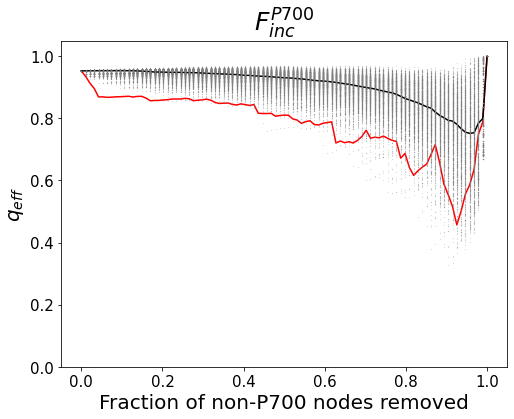

In [27]:
Test = np.genfromtxt(os.getcwd() + '\data\qeff_farness_inc.csv', delimiter=',')
Label = '$F_{inc}^{P700}$'

test, control = np.sum(Test, axis=0), np.sum(qeff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(qeff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], Test, label=Label, c='red')
ax.plot([i/94 for i in range(95)], qeff_rand_median, label='Rand', c='black') 
for i in range(len(qeff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(qeff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * 1000, qeff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True) 
ax.set_ylim(0, 1.05)
ax.set_ylabel('$q_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)
if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/qeff_Finc.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/qeff_Finc.' + fig_filetype, dpi=300)


plt.show()



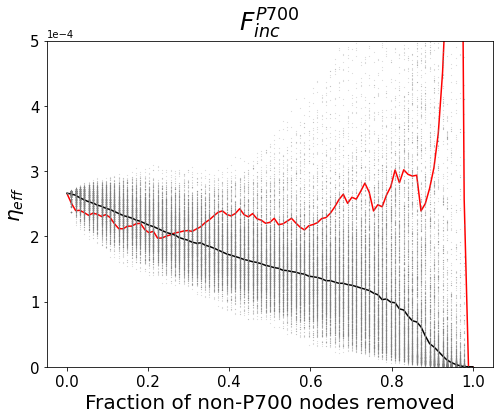

In [28]:
Test = np.genfromtxt(os.getcwd() + '\data\\neff_farness_dec.csv', delimiter=',')
Label = '$F_{inc}^{P700}$' 
sims=np.shape(neff_rand)[1]

test, control = np.sum(Test, axis=0), np.sum(neff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(neff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], Test, label=Label, c='red')
ax.plot([i/94 for i in range(95)], neff_rand_median, label='Rand', c='black') 
for i in range(len(neff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(neff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * sims, neff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True)
ax.set_ylim(0, 0.0005)
ax.set_ylabel('$\eta_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/neff_Finc.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/neff_Finc.' + fig_filetype, dpi=300)
    
plt.show()


## Strategy 6: Decreasing direct transfer to P700 (nodes with highest direct transfer to P700 removed first)

In [29]:
if create_data:
    g = gc.Graph()
    N = 96
    #Initialize all nodes
    for i in range(N): 
        g.addNode(gc.Node(nmc.ps1_df, i))

    for i in range(N):
        for j in range(N):
            if i != j:
                node_i = g.nodes[i]
                node_j = g.nodes[j]
                edge_add = gc.Edge(node_i, node_j)
                edge_add.setWeight(gc.transfer_rate(node_i, node_j))
                g.addEdge(edge_add)
                
    g.P700lookup()
    g.init_Costs()

    P700transfer = [g.transferToP700(g.nodes[i]) for i in range(len(g.nodes))]
    sorted_P700transfer_dec = [g.nodes[i] for i, _ in sorted(enumerate(P700transfer), key=lambda x: x[1], reverse=True) if str(g.nodes[i]) not in ['CLA1011.A', 'CLA1021.B']] 
    g.K_ij()
    qeff_P700transfer_dec = [g.Qeff()]
    k_diss = 0.001

    for node in sorted_P700transfer_dec:
        g.removeNode(node)
        g.K_ij()
        qeff_P700transfer_dec.append(g.Qeff())

    qeff_P700transfer_dec = np.array(qeff_P700transfer_dec)
    lifetime_P700transfer_dec = (1-qeff_P700transfer_dec)/(k_diss)

    #Generate qeff and lifetime data in Excel
    filename1 = os.getcwd() + "/data/qeff_P700transfer_dec.csv"
    filename2 = os.getcwd() + "/data/lifetime_P700transfer_dec.csv"

    np.savetxt(filename1, qeff_P700transfer_dec.reshape(-1,1), delimiter=',')
    np.savetxt(filename2, lifetime_P700transfer_dec.reshape(-1,1), delimiter=',')

if create_data_neff:
    g = gc.Graph()
    N = 96
    #Initialize all nodes
    for i in range(N): 
        g.addNode(gc.Node(nmc.ps1_df, i))

    for i in range(N):
        for j in range(N):
            if i != j:
                node_i = g.nodes[i]
                node_j = g.nodes[j]
                edge_add = gc.Edge(node_i, node_j)
                edge_add.setWeight(gc.transfer_rate(node_i, node_j))
                g.addEdge(edge_add)
                
    g.P700lookup()
    g.init_Costs()

    P700transfer = [g.transferToP700(g.nodes[i]) for i in range(len(g.nodes))]
    sorted_P700transfer_dec = [g.nodes[i] for i, _ in sorted(enumerate(P700transfer), key=lambda x: x[1], reverse=True) if str(g.nodes[i]) not in ['CLA1011.A', 'CLA1021.B']] 
    neff_P700transfer_dec = [g.Neff()]

    for node in sorted_P700transfer_dec:
        g.removeNode(node)
        g.K_ij()
        neff_P700transfer_dec.append(g.Neff())

    neff_P700transfer_dec = np.array(neff_P700transfer_dec)

    #Generate qeff and lifetime data in Excel
    filename3 = os.getcwd() + "/data/neff_P700transfer_dec.csv"

    np.savetxt(filename3, neff_P700transfer_dec.reshape(-1,1), delimiter=',')


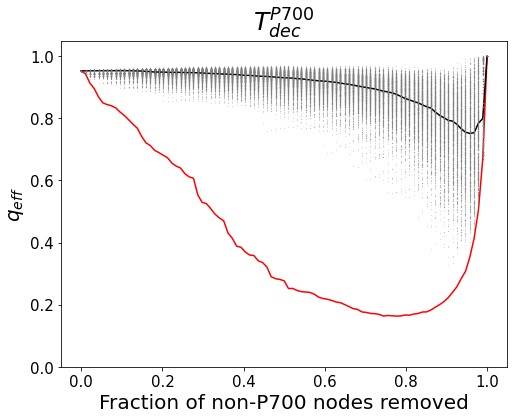

In [30]:
Test = np.genfromtxt(os.getcwd() + '\data\qeff_P700transfer_dec.csv', delimiter=',')
Label = '$T^{P700}_{dec}$'


test, control = np.sum(Test, axis=0), np.sum(qeff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(qeff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], Test, label=Label, c='red')
ax.plot([i/94 for i in range(95)], qeff_rand_median, label='Rand', c='black') 
for i in range(len(qeff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(qeff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * 1000, qeff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True) 
ax.set_ylim(0, 1.05)
ax.set_ylabel('$q_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)


if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/qeff_TP700_dec.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/qeff_TP700_dec.' + fig_filetype, dpi=300)

plt.show()


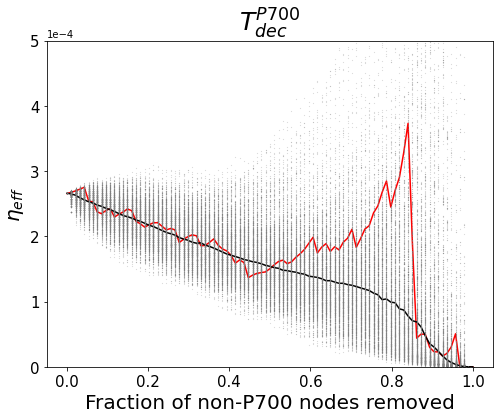

In [31]:
Test = np.genfromtxt(os.getcwd() + '\data\\neff_P700transfer_dec.csv', delimiter=',')
Label = '$T^{P700}_{dec}$' 
sims=np.shape(neff_rand)[1]

test, control = np.sum(Test, axis=0), np.sum(neff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(neff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], Test, label=Label, c='red')
ax.plot([i/94 for i in range(95)], neff_rand_median, label='Rand', c='black') 
for i in range(len(neff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(neff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * sims, neff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True) 
ax.set_ylim(0, 0.0005)
ax.set_ylabel('$\eta_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/neff_TP700_dec.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/neff_TP700_dec.' + fig_filetype, dpi=300)
    
plt.show()


## Strategy 7: Increasing distance to P700 (nodes closest to P700 removed first)

In [32]:
if create_data:
    g = gc.Graph()
    N = 96
    #Initialize all nodes
    for i in range(N): 
        g.addNode(gc.Node(nmc.ps1_df, i))

    for i in range(N):
        for j in range(N):
            if i != j:
                node_i = g.nodes[i]
                node_j = g.nodes[j]
                edge_add = gc.Edge(node_i, node_j)
                edge_add.setWeight(gc.transfer_rate(node_i, node_j))
                g.addEdge(edge_add)
                
    g.P700lookup()
    g.init_Costs()

    P700dist = [g.euclidean_node_P700distance(g.nodes[i]) for i in range(len(g.nodes))]
    sorted_P700dist = [g.nodes[i] for i, _ in sorted(enumerate(P700dist), key=lambda x: x[1], reverse=False) if str(g.nodes[i]) not in ['CLA1011.A', 'CLA1021.B']] 
    g.K_ij()
    qeff_P700dist = [g.Qeff()]
    k_diss = 0.001

    for node in sorted_P700dist:
        g.removeNode(node)
        g.K_ij()
        qeff_P700dist.append(g.Qeff())

    qeff_P700dist= np.array(qeff_P700dist)
    lifetime_P700dist = (1-qeff_P700dist)/(k_diss)

    #Generate qeff and lifetime data in Excel
    filename1 = os.getcwd() + "/data/qeff_P700dist_inc.csv"
    filename2 = os.getcwd() + "/data/lifetime_P700dist_inc.csv"

    np.savetxt(filename1, qeff_P700dist.reshape(-1,1), delimiter=',')
    np.savetxt(filename2, lifetime_P700dist.reshape(-1,1), delimiter=',')

if create_data_neff:
    g = gc.Graph()
    N = 96
    #Initialize all nodes
    for i in range(N): 
        g.addNode(gc.Node(nmc.ps1_df, i))

    for i in range(N):
        for j in range(N):
            if i != j:
                node_i = g.nodes[i]
                node_j = g.nodes[j]
                edge_add = gc.Edge(node_i, node_j)
                edge_add.setWeight(gc.transfer_rate(node_i, node_j))
                g.addEdge(edge_add)
                
    g.P700lookup()
    g.init_Costs()

    P700dist = [g.euclidean_node_P700distance(g.nodes[i]) for i in range(len(g.nodes))]
    sorted_P700dist = [g.nodes[i] for i, _ in sorted(enumerate(P700dist), key=lambda x: x[1], reverse=False) if str(g.nodes[i]) not in ['CLA1011.A', 'CLA1021.B']] 
    g.K_ij()
    neff_P700dist = [g.Neff()]
    k_diss = 0.001

    for node in sorted_P700dist:
        g.removeNode(node)
        g.K_ij()
        neff_P700dist.append(g.Neff())

    neff_P700dist= np.array(neff_P700dist)

    #Generate qeff and lifetime data in Excel
    filename3 = os.getcwd() + "/data/neff_P700dist_inc.csv"

    np.savetxt(filename3, neff_P700dist.reshape(-1,1), delimiter=',')


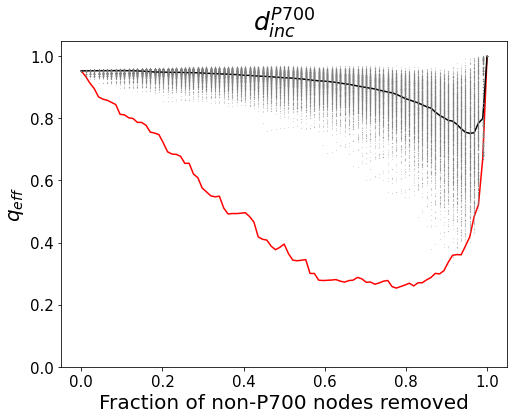

In [33]:
Test = np.genfromtxt(os.getcwd() + '\data\qeff_P700dist_inc.csv', delimiter=',')
Label = '$d^{P700}_{inc}$'


test, control = np.sum(Test, axis=0), np.sum(qeff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(qeff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], Test, label=Label, c='red')
ax.plot([i/94 for i in range(95)], qeff_rand_median, label='Rand', c='black') 
for i in range(len(qeff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(qeff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * 1000, qeff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True) 
ax.set_ylim(0, 1.05)
ax.set_ylabel('$q_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)

# Show the plots
if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/qeff_dP700_inc.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/qeff_dP700_inc.' + fig_filetype, dpi=300)

    
plt.show()


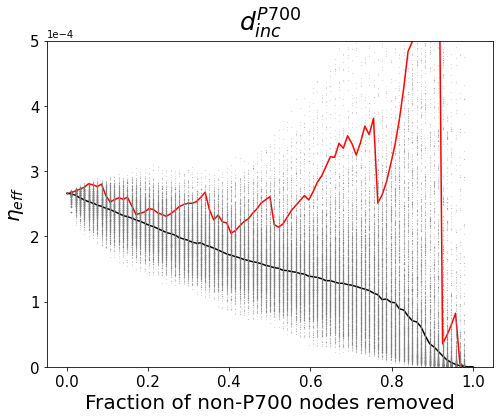

In [34]:
Test = np.genfromtxt(os.getcwd() + '\data\\neff_P700dist_inc.csv', delimiter=',')
Label = '$d^{P700}_{inc}$' 
sims=np.shape(neff_rand)[1]

test, control = np.sum(Test, axis=0), np.sum(neff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(neff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], Test, label=Label, c='red')
ax.plot([i/94 for i in range(95)], neff_rand_median, label='Rand', c='black') 
for i in range(len(neff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(neff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * sims, neff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True) 
ax.set_ylim(0, 0.0005)
ax.set_ylabel('$\eta_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/neff_dP700_inc.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/neff_dP700_inc.' + fig_filetype, dpi=300)
    
plt.show()


In [35]:
Test = np.genfromtxt(os.getcwd() + '\data\\qeff_P700transfer_dec.csv', delimiter=',')
Control = np.genfromtxt(os.getcwd() + '\data\\qeff_P700dist_inc.csv', delimiter=',')

testMax, controlMax = np.sum(Test), np.sum(Control)
maxR = np.max([testMax, controlMax])
comparison = [[testMax/maxR], [controlMax/maxR]] 

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/qeff_dP700vsTP700.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/qeff_dP700vsTP700.' + fig_filetype, dpi=300)

## Strategy 8: Betweenness-centrality based (nodes with highest constrained BC are removed first)

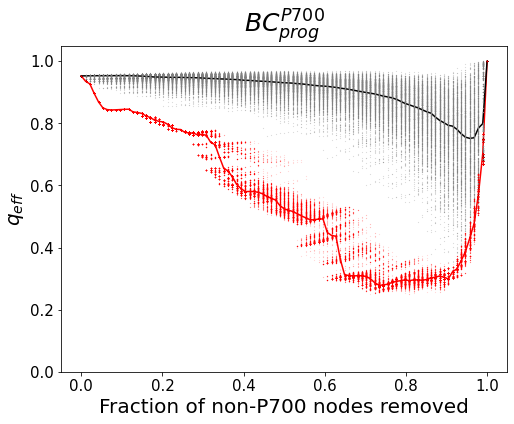

In [36]:
Test = np.genfromtxt(os.getcwd() + '\data\qeff_BCs.csv', delimiter=',')
Label = '$BC^{P700}_{prog}$'


test, control = np.sum(Test, axis=0), np.sum(qeff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(qeff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], qeff_BC_median, label=Label, c='red')
ax.plot([i/94 for i in range(95)], qeff_rand_median, label='Rand', c='black') 
for i in range(len(qeff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(qeff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * 1000, qeff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True) 

for i in range(len(qeff_BC_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(qeff_BC_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    plt.plot([normalized_i] * 1000, qeff_BCs[i], 'o', markersize=0.1, color='red', alpha=0.5, rasterized=True)
    
ax.set_ylim(0, 1.05)
ax.set_ylabel('$q_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)

# Show the plots

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/qeff_BC_prog.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/qeff_BC_prog.' + fig_filetype, dpi=300)
    
plt.show()



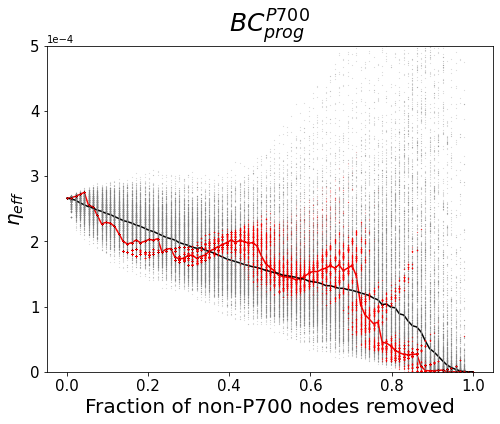

In [37]:
Test = np.genfromtxt(os.getcwd() + '\data\\neff_BCs.csv', delimiter=',')
Label = '$BC^{P700}_{prog}$'
sims_rand=np.shape(neff_rand)[1]
sims_BC = np.shape(neff_BC)[1]

test, control = np.sum(Test, axis=0), np.sum(neff_rand, axis=0)
testMax = np.max(np.sum(Test, axis=0))
controlMax = np.max(np.sum(neff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([i/94 for i in range(95)], neff_BC_median, label=Label, c='red')
ax.plot([i/94 for i in range(95)], neff_rand_median, label='Rand', c='black') 
for i in range(len(neff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(neff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * sims_rand, neff_rand[i], 'o', markersize=0.1, color='gray', rasterized=True) 

for i in range(len(neff_BC_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(neff_BC_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    plt.plot([normalized_i] * sims_BC, neff_BC[i], 'o', markersize=0.1, color='red', alpha=0.5, rasterized=True)
    
ax.set_ylim(0, 0.0005)
ax.set_ylabel('$\eta_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.set_title(Label, fontsize=25)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.tick_params(axis='both', labelsize=15)

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/neff_BC_prog.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/neff_BC_prog.' + fig_filetype, dpi=300)
    
plt.show()



In [38]:
# plt.figure(figsize=(15,10))
qeff_BCs = np.genfromtxt(os.getcwd() + '\data\qeff_BCs.csv', delimiter=',')
qeff_rand = np.genfromtxt(os.getcwd() + '\data\qeff_random.csv', delimiter=',')
qeff_farness_asc = np.genfromtxt(os.getcwd() + '\data\qeff_farness_asc.csv', delimiter=',')
qeff_inStrength_dec = np.genfromtxt(os.getcwd() + '\data\qeff_inStrength_dec.csv', delimiter=',')
qeff_inStrength_asc = np.genfromtxt(os.getcwd() + '\data\qeff_inStrength_asc.csv', delimiter=',')
qeff_outStrength_asc = np.genfromtxt(os.getcwd() + '\data\qeff_outStrength_asc.csv', delimiter=',')
qeff_outStrength_dec = np.genfromtxt(os.getcwd() + '\data\qeff_outStrength_dec.csv', delimiter=',')
qeff_P700transfer_dec = np.genfromtxt(os.getcwd() + '\data\qeff_P700transfer_dec.csv', delimiter=',')
qeff_P700dist_inc = np.genfromtxt(os.getcwd() + '\data\qeff_P700dist_inc.csv', delimiter=',')

qeff_test = np.array([np.sum(qeff_farness_asc), np.sum(qeff_inStrength_dec), np.sum(qeff_inStrength_asc), 
        np.sum(qeff_outStrength_asc), np.sum(qeff_outStrength_dec), np.sum(qeff_P700transfer_dec), np.sum(qeff_P700dist_inc), 
        np.max(np.sum(qeff_rand, axis=0)), np.max(np.sum(qeff_BCs, axis=0))])
qeff_maxVal = np.max(qeff_test)

qeff_Comparison = [np.sum(qeff_inStrength_dec), np.sum(qeff_inStrength_asc), np.sum(qeff_outStrength_dec), np.sum(qeff_outStrength_asc), 
              np.sum(qeff_farness_asc),  np.sum(qeff_P700dist_inc), np.sum(qeff_P700transfer_dec),
        np.sum(qeff_BCs, axis=0), np.sum(qeff_rand, axis=0)]

qeff_Comparison = [i/qeff_maxVal for i in qeff_Comparison] 

neff_BCs = np.genfromtxt(os.getcwd() + '\data\\neff_BCs.csv', delimiter=',')
neff_rand = np.genfromtxt(os.getcwd() + '\data\\neff_random.csv', delimiter=',')
neff_farness_asc = np.genfromtxt(os.getcwd() + '\data\\neff_farness_asc.csv', delimiter=',')
neff_inStrength_dec = np.genfromtxt(os.getcwd() + '\data\\neff_inStrength_dec.csv', delimiter=',')
neff_inStrength_asc = np.genfromtxt(os.getcwd() + '\data\\neff_inStrength_asc.csv', delimiter=',')
neff_outStrength_asc = np.genfromtxt(os.getcwd() + '\data\\neff_outStrength_asc.csv', delimiter=',')
neff_outStrength_dec = np.genfromtxt(os.getcwd() + '\data\\neff_outStrength_dec.csv', delimiter=',')
neff_P700transfer_dec = np.genfromtxt(os.getcwd() + '\data\\neff_P700transfer_dec.csv', delimiter=',')
neff_P700dist_inc = np.genfromtxt(os.getcwd() + '\data\\neff_P700dist_inc.csv', delimiter=',')

neff_test = np.array([np.sum(neff_farness_asc), np.sum(neff_inStrength_dec), np.sum(neff_inStrength_asc), 
        np.sum(neff_outStrength_asc), np.sum(neff_outStrength_dec), np.sum(neff_P700transfer_dec), np.sum(neff_P700dist_inc), 
        np.max(np.sum(neff_rand, axis=0)), np.max(np.sum(neff_BCs, axis=0))])
neff_maxVal = np.max(neff_test)

neff_Comparison = [np.sum(neff_inStrength_dec), np.sum(neff_inStrength_asc), np.sum(neff_outStrength_dec), np.sum(neff_outStrength_asc), 
              np.sum(neff_farness_asc),  np.sum(neff_P700dist_inc), np.sum(neff_P700transfer_dec),
        np.sum(neff_BCs, axis=0), np.sum(neff_rand, axis=0)]

neff_Comparison = [i/neff_maxVal for i in neff_Comparison] 

In [39]:
for i in neff_Comparison:
    print(np.median(i))

0.03459930195145202
1.0
0.035378490732578725
0.8515727984708066
0.2465131295622158
0.13855210096605486
0.08901236084871154
0.0709801040037436
0.07769995709819663


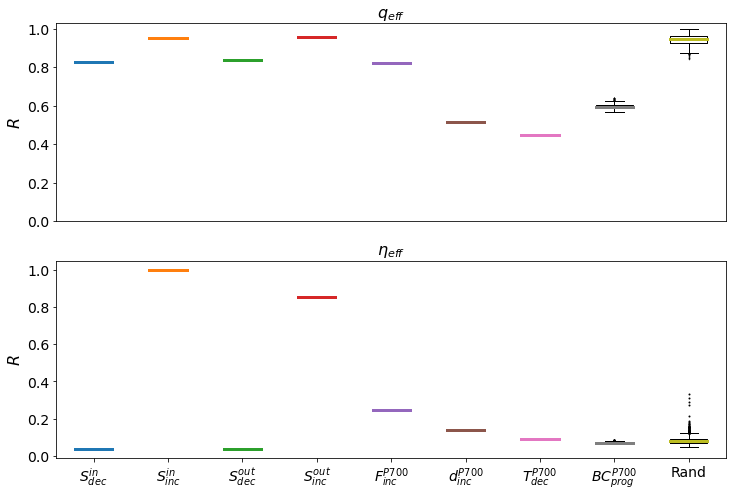

In [40]:
fig, ax = plt.subplots(2,1, figsize=(12, 8))
box_colors = plt.cm.tab10.colors
boxplot1=ax[0].boxplot(qeff_Comparison)
boxplot2=ax[1].boxplot(neff_Comparison)

for i in range(len(boxplot1['medians'])):
    boxplot1['medians'][i].set_linewidth(3) 
    boxplot1['medians'][i].set(color=box_colors[i])
    boxplot1['fliers'][i].set(markersize=0.5)
    boxplot2['medians'][i].set_linewidth(3) 
    boxplot2['medians'][i].set(color=box_colors[i])
    boxplot2['fliers'][i].set(markersize=1)

ax[0].set_xticks([])
ax[0].set_title('$q_{eff}$', fontsize=16)
ax[0].set_ylabel('$R$', fontsize=16)
ax[0].set_yticks([i/5 for i in range(6)])
ax[0].tick_params(axis='y', labelsize=14)


ax[1].set_xticklabels(['$S^{in}_{dec}$', '$S^{in}_{inc}$', '$S^{out}_{dec}$', '$S^{out}_{inc}$', '$F^{P700}_{inc}$', '$d^{P700}_{inc}$', '$T^{P700}_{dec}$', '$BC^{P700}_{prog}$', 'Rand'], fontsize=14)
ax[1].set_title('$\eta_{eff}$', fontsize=16)
ax[1].set_ylabel('$R$', fontsize=16)
ax[1].set_yticks([i/5 for i in range(6)])
ax[1].tick_params(axis='y', labelsize=14)

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/robustness.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/robustness.' + fig_filetype, dpi=300)


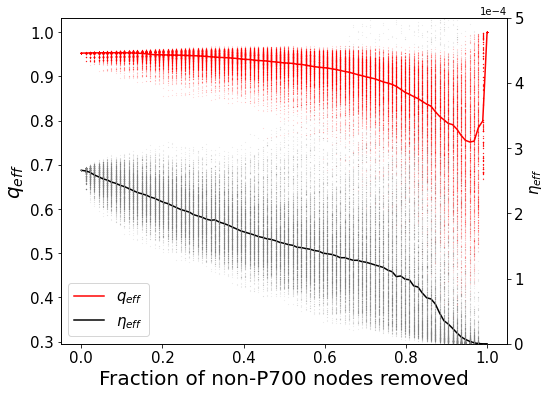

In [41]:
sims_nrand=np.shape(neff_rand)[1]
sims_qrand = np.shape(qeff_rand)[1]

test, control = np.sum(qeff_rand, axis=0), np.sum(neff_rand, axis=0)
testMax = np.max(np.sum(qeff_rand, axis=0))
controlMax = np.max(np.sum(neff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test/maxR, control/maxR] 

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))
ax2= ax.twinx()
line1,=ax.plot([i/94 for i in range(95)], qeff_rand_median, label='$q_{eff}$', c='red')
line2,=ax2.plot([i/94 for i in range(95)], neff_rand_median, label='$\eta_{eff}$', c='black') 
for i in range(len(qeff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(qeff_rand_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax.plot([normalized_i] * sims_qrand, qeff_rand[i], 'o', markersize=0.1, color='red', alpha=0.5, rasterized=True) 

for i in range(len(neff_rand_median)):
    # Normalize the x-values to the range [0, 1]
    normalized_i = i / (len(neff_BC_median)-1) 
    # Use 'normalized_x' as the x-values, and 'data[x]' as the corresponding y-values
    ax2.plot([normalized_i] * sims_nrand, neff_rand[i], 'o', markersize=0.1, color='gray', alpha=0.5, rasterized=True)
    
ax2.set_ylim(0, 0.0005)
ax2.set_ylabel('$\eta_{eff}$',fontsize=15)
ax.set_ylabel('$q_{eff}$',fontsize=20)
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='lower left', fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

if download_plots:
    if fig_filetype=='pdf':
        plt.savefig('figures/neffvsrand.' + fig_filetype)
    if fig_filetype=='png':
         plt.savefig('figures/neffvsrand.' + fig_filetype, dpi=300)
    
plt.show()



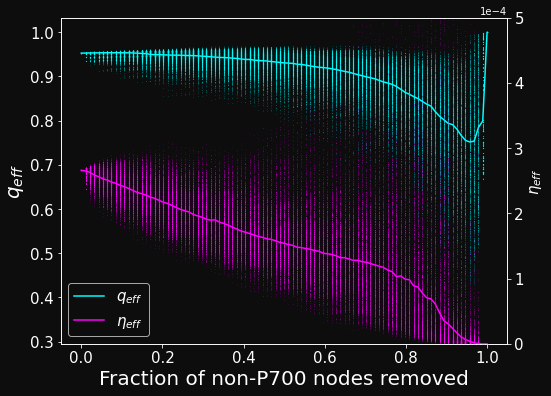

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the necessary data is already loaded or generated
sims_nrand = np.shape(neff_rand)[1]
sims_qrand = np.shape(qeff_rand)[1]

test, control = np.sum(qeff_rand, axis=0), np.sum(neff_rand, axis=0)
testMax = np.max(np.sum(qeff_rand, axis=0))
controlMax = np.max(np.sum(neff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test / maxR, control / maxR]

# Create the main plot with the specified background color
background_color = '#0D0D0D'
fig, ax = plt.subplots(figsize=(8, 6), facecolor=background_color)
ax2 = ax.twinx()

# Set the colors for the axes
ax.set_facecolor(background_color)
ax2.set_facecolor(background_color)

# Set the line colors to be more visible on a dark background
line1, = ax.plot([i / 94 for i in range(95)], qeff_rand_median, label='$q_{eff}$', c='cyan')
line2, = ax2.plot([i / 94 for i in range(95)], neff_rand_median, label='$\eta_{eff}$', c='magenta')

# Plot data points with inverted colors
for i in range(len(qeff_rand_median)):
    normalized_i = i / (len(qeff_rand_median) - 1)
    ax.plot([normalized_i] * sims_qrand, qeff_rand[i], 'o', markersize=0.1, color='cyan', alpha=0.5, rasterized=True)

for i in range(len(neff_rand_median)):
    normalized_i = i / (len(neff_BC_median) - 1)
    ax2.plot([normalized_i] * sims_nrand, neff_rand[i], 'o', markersize=0.1, color='magenta', alpha=0.5, rasterized=True)

# Set labels and ticks colors to white
ax2.set_ylim(0, 0.0005)
ax2.set_ylabel('$\eta_{eff}$', fontsize=15, color='white')
ax.set_ylabel('$q_{eff}$', fontsize=20, color='white')
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20, color='white')

# Set the tick parameters to white
ax.tick_params(axis='both', which='major', labelsize=15, colors='white')
ax2.tick_params(axis='both', which='major', labelsize=15, colors='white')

# Set the tick labels to scientific format
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Set the legend text color to white
lines = [line1, line2]
labels = [line.get_label() for line in lines]
legend = ax.legend(lines, labels, loc='lower left', fontsize=15)
legend.get_frame().set_facecolor(background_color)
for text in legend.get_texts():
    text.set_color('white')

# Set the plot borders to white
for spine in ax.spines.values():
    spine.set_edgecolor('white')
for spine in ax2.spines.values():
    spine.set_edgecolor('white')
    
# Save and show the plot
if download_plots:
    if fig_filetype == 'pdf':
        plt.savefig('figures/neffvsrand.' + fig_filetype, facecolor=background_color)
    if fig_filetype == 'png':
        plt.savefig('figures/neffvsrand.' + fig_filetype, dpi=300, facecolor=background_color)

plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


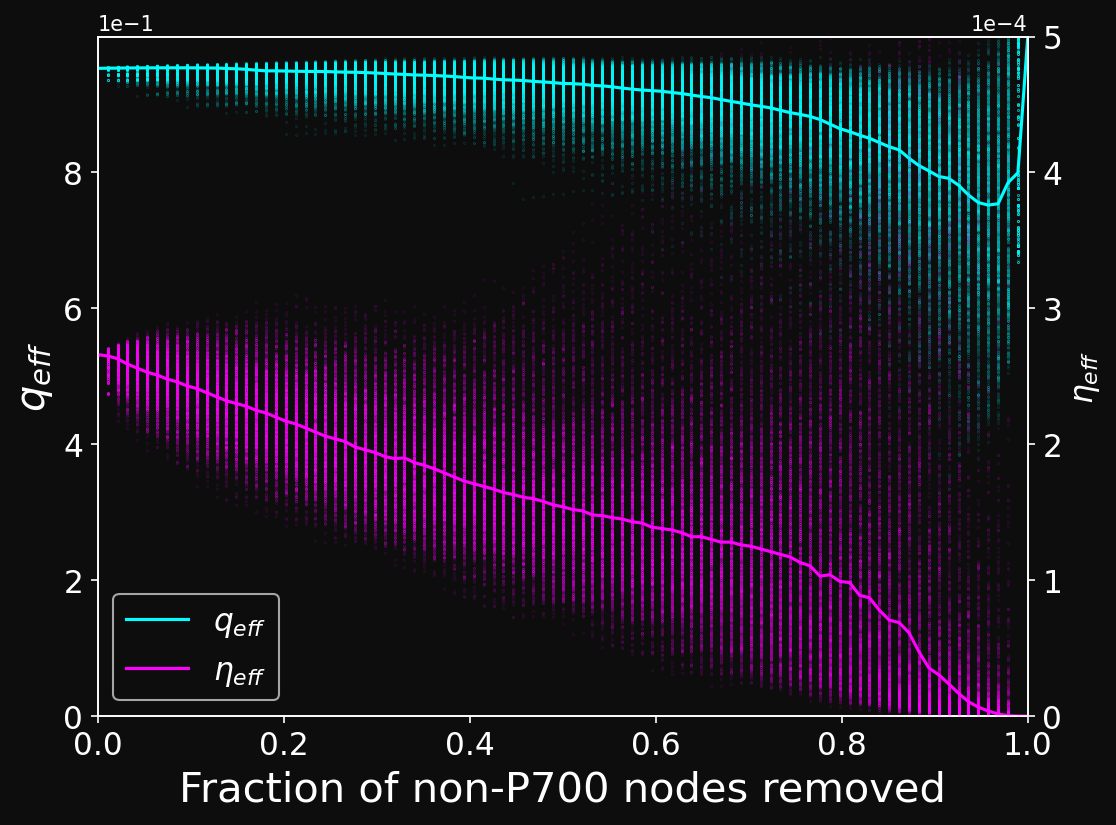

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

sims_nrand = np.shape(neff_rand)[1]
sims_qrand = np.shape(qeff_rand)[1]

test, control = np.sum(qeff_rand, axis=0), np.sum(neff_rand, axis=0)
testMax = np.max(np.sum(qeff_rand, axis=0))
controlMax = np.max(np.sum(neff_rand, axis=0))
maxR = np.max([testMax, controlMax])
comparison = [test / maxR, control / maxR]

# Create the main plot with the specified background color
background_color = '#0D0D0D'
fig, ax = plt.subplots(figsize=(8, 6), facecolor=background_color, dpi=150)
ax2 = ax.twinx()

# Set the colors for the axes
ax.set_facecolor(background_color)
ax2.set_facecolor(background_color)

# Set labels and ticks colors to white
ax2.set_ylim(0, 0.0005)
ax2.set_ylabel('$\eta_{eff}$', fontsize=15, color='white')
ax.set_ylabel('$q_{eff}$', fontsize=20, color='white')
ax.set_xlabel('Fraction of non-P700 nodes removed', fontsize=20, color='white')

# Set the tick parameters to white
ax.tick_params(axis='both', which='major', labelsize=15, colors='white')
ax2.tick_params(axis='both', which='major', labelsize=15, colors='white')

# Set the tick labels to scientific format
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Set the legend text color to white
lines = [line1, line2]
labels = [line.get_label() for line in lines]
legend = ax.legend(lines, labels, loc='lower left', fontsize=15)
legend.get_frame().set_facecolor(background_color)
for text in legend.get_texts():
    text.set_color('white')

# Set the plot borders to white
for spine in ax.spines.values():
    spine.set_edgecolor('white')
for spine in ax2.spines.values():
    spine.set_edgecolor('white')

# Initialize lines
line1, = ax.plot([], [], label='$q_{eff}$', c='cyan')
line2, = ax2.plot([], [], label='$\eta_{eff}$', c='magenta')

# Plot data points with inverted colors (initialize as empty)
points1, = ax.plot([], [], 'o', markersize=0.1, color='cyan', alpha=0.5, rasterized=True)
points2, = ax2.plot([], [], 'o', markersize=0.1, color='magenta', alpha=0.5, rasterized=True)

# Set axis limits
ax.set_xlim(0, 1)
ax.set_ylim(0, np.max(qeff_rand_median))
ax2.set_ylim(0, 0.0005)

# Define the frame where neff plot finishes
NEFF_FINISH_FRAME = len(neff_rand_median)

# Define the frame where qeff plotting should start (120 frames after neff plot finishes)
QEFF_START_FRAME = NEFF_FINISH_FRAME + 120

# Update function for the animation
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    points1.set_data([], [])
    points2.set_data([], [])
    return line1, line2, points1, points2

def update(frame):
    if frame < NEFF_FINISH_FRAME:
        # Update neff plot
        x_data = [i / 94 for i in range(frame + 1)]
        y_data2 = neff_rand_median[:frame + 1]
        line2.set_data(x_data, y_data2)

        # Update points for neff
        points2_x = []
        points2_y = []
        for i in range(frame + 1):
            points2_x.extend([i / 94] * sims_nrand)
            points2_y.extend(neff_rand[i])
        points2.set_data(points2_x, points2_y)
    elif frame >= QEFF_START_FRAME:
        # Update qeff plot
        x_data = [i / 94 for i in range(frame + 1 - QEFF_START_FRAME)]
        y_data1 = qeff_rand_median[:frame + 1 - QEFF_START_FRAME]
        line1.set_data(x_data, y_data1)

        # Update points for qeff
        points1_x = []
        points1_y = []
        for i in range(frame + 1 - QEFF_START_FRAME):
            points1_x.extend([i / 94] * sims_qrand)
            points1_y.extend(qeff_rand[i])
        points1.set_data(points1_x, points1_y)
    else:
        # No updates, only increment frame
        pass

    return line1, line2, points1, points2

# Create the animation
ani = FuncAnimation(fig, update, frames=2*len(qeff_rand_median) + 120, init_func=init, blit=True, repeat=False)

# Save and show the plot
if download_plots:
    ani.save('figures/neffvsqeff.gif', writer='imagemagick', fps=30)

plt.show()